In [34]:
import pandas as pd

file_path: str = r"salaries_by_college_major.csv"
df: pd.DataFrame = pd.read_csv(file_path)
df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,Accounting,46000.0,77100.0,42200.0,152000.0,Business
1,Aerospace Engineering,57700.0,101000.0,64300.0,161000.0,STEM
2,Agriculture,42600.0,71900.0,36300.0,150000.0,Business
3,Anthropology,36800.0,61500.0,33800.0,138000.0,HASS
4,Architecture,41600.0,76800.0,50600.0,136000.0,Business


#### Cleaning the Data


In [35]:
clean_df: pd.DataFrame = df.drop(50)  # Removing the row with NaN (Not a Number Values)

#### College Major with highest Starting salaries


In [36]:
def college_major_with_highest_starting_salaries() -> None:

    major_with_highest_starting_salary: pd.Series = clean_df["Starting Median Salary"]

    highest_starting_salaries = major_with_highest_starting_salary.max()

    lowest_starting_salaries = major_with_highest_starting_salary.min()

    name_of_major = clean_df.loc[43, "Undergraduate Major"]

    print(
        f"Name of Major {name_of_major}\nMajor with Maximum Salaries {highest_starting_salaries}\nMajor with lowest Starting Salary {lowest_starting_salaries}"
    )


college_major_with_highest_starting_salaries()

Name of Major Physician Assistant
Major with Maximum Salaries 74300.0
Major with lowest Starting Salary 34000.0


#### College Major with Highest Mid Career Salary


In [37]:
def College_Major_with_Highest_Mid_Career_Salary() -> None:
    index_highest_mid_salary = clean_df["Mid-Career Median Salary"].idxmax()

    name: pd.Series = clean_df.loc[8, "Undergraduate Major"]
    salary = clean_df["Mid-Career Median Salary"].max()

    print(f"Name: {name}\nSalary: {salary}")


College_Major_with_Highest_Mid_Career_Salary()

Name: Chemical Engineering
Salary: 107000.0


#### Lowest Starting and mid Career Salary


In [38]:
def lowest_starting_salary() -> None:

    min_starting_salary = clean_df["Starting Median Salary"].min()
    index_of_min_starting_salary = clean_df["Starting Median Salary"].idxmin()
    name: pd.Series = clean_df.loc[index_of_min_starting_salary, "Undergraduate Major"]

    print(f"Major Name: {name}\nSalary: {min_starting_salary}")


def lowest_mid_career_salary() -> None:
    # Mid Career Salary
    min_starting_salary = clean_df["Starting Median Salary"].min()
    index_of_min_starting_salary = clean_df["Starting Median Salary"].idxmin()
    name_career: pd.Series = clean_df.loc[
        index_of_min_starting_salary, "Undergraduate Major"
    ]

    print(f"Major Name: {name_career}\nSalary: {min_starting_salary}")


lowest_starting_salary()
lowest_mid_career_salary()

Major Name: Spanish
Salary: 34000.0
Major Name: Spanish
Salary: 34000.0


#### Lowest Risk Major


In [39]:
def lowest_risk_major() -> None:
    """This would print the major that have the lowest risk out of all"""

    tenth_percentile_salary = clean_df["Mid-Career 10th Percentile Salary"]
    nintheth_percentile_salary = clean_df["Mid-Career 90th Percentile Salary"]
    low_risk_major_col = nintheth_percentile_salary.subtract(tenth_percentile_salary)

    # Soring the Values
    low_risk = clean_df.sort_values("Spread")
    x = low_risk.loc[0, "Undergraduate Major"]
    print(f"Name: {x}")


lowest_risk_major()

KeyError: 'Spread'

<h3>Highest Risk major</h3>


In [41]:
def highest_risk_major() -> None:
    """This would print the major that have the lowest risk out of all"""

    tenth_percentile_salary: pd.Series = clean_df["Mid-Career 10th Percentile Salary"]
    nintheth_percentile_salary: pd.Series = clean_df[
        "Mid-Career 90th Percentile Salary"
    ]
    high_risk_major_col: int = tenth_percentile_salary.subtract(
        nintheth_percentile_salary
    ).idxmin()

    # Soring the Values
    high_risk: pd.Series = clean_df.sort_values("Spread", ascending=False)

    x: pd.Series = high_risk.loc[high_risk_major_col, "Undergraduate Major"]
    print(f"Name: {x}")


highest_risk_major()

KeyError: 'Spread'

#### Top 5 Hightest Potential Degrees


In [42]:
def top_5_hightest_potential_degrees() -> pd.DataFrame:

    highest_poential_degrees = clean_df.sort_values(
        "Mid-Career 90th Percentile Salary", ascending=False
    )
    return highest_poential_degrees[["Undergraduate Major"]].head()


top_5_hightest_potential_degrees()

,Undergraduate Major
17,Economics
22,Finance
8,Chemical Engineering
37,Math
44,Physics


## Data Visualization


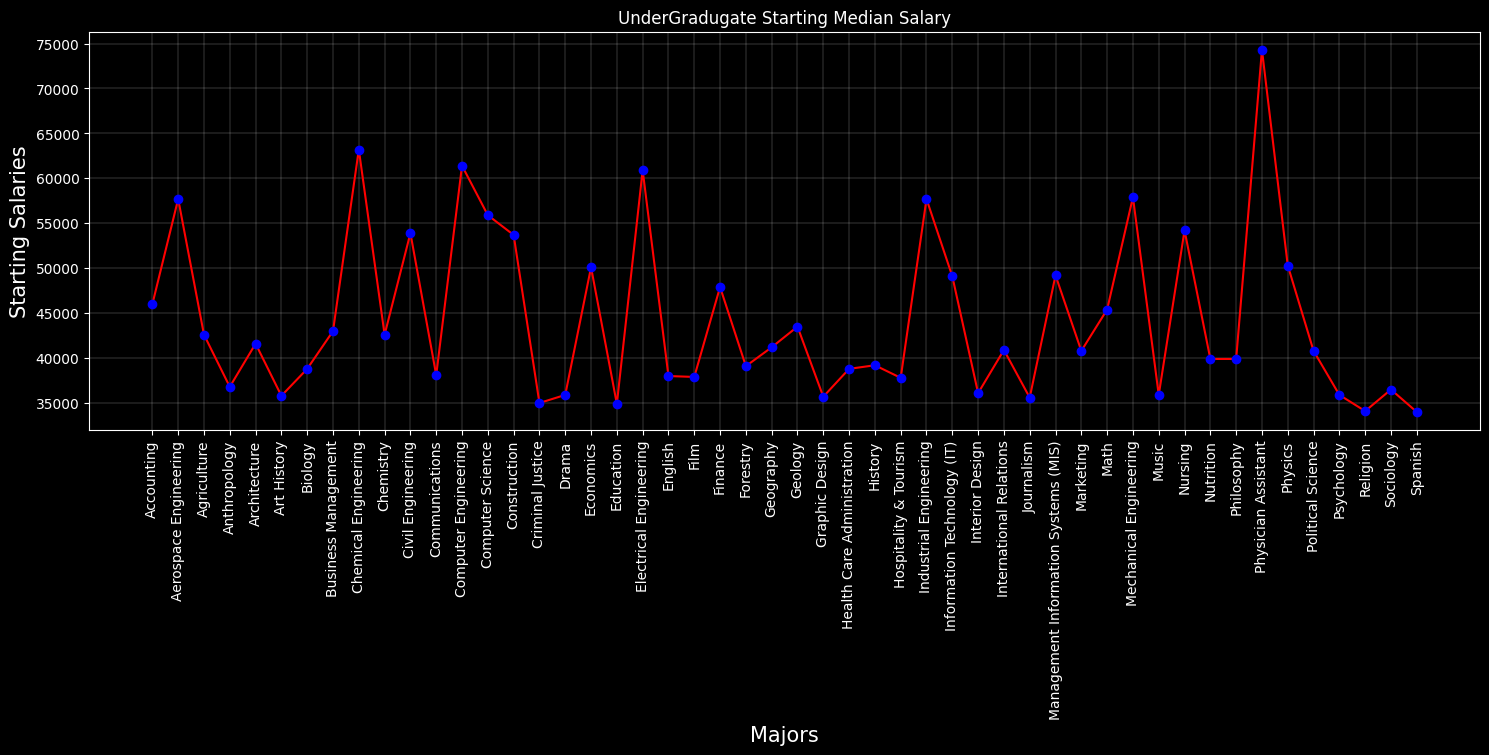

In [76]:
import matplotlib.pyplot as plt


def start_median_salary() -> plt:
    """This would visualize the graph with the highest starting median salaries of college major"""

    grouped_data: pd.DataFrame = (
        df.groupby(["Undergraduate Major", "Starting Median Salary"])
        .sum()
        .reset_index()
    )
    new_df = pd.DataFrame(grouped_data)

    x_cor: pd.Series = new_df["Undergraduate Major"]
    y_cor: pd.Series = new_df["Starting Median Salary"]

    graph_title: str = "UnderGradugate Starting Median Salary"
    x_cor_label: str = "Majors"
    y_cor_label: str = "Starting Salaries"

    plt.figure(figsize=(15, 5))
    plt.title(graph_title)
    plt.xlabel(x_cor_label, fontsize=15)
    plt.ylabel(y_cor_label, fontsize=15)
    plt.plot(x_cor, y_cor, color="red")
    plt.scatter(x_cor, y_cor, color="blue", zorder=5)
    plt.grid(visible=True, which="both", linestyle="-", linewidth=0.1577)

    plt.tight_layout()
    plt.xticks(rotation=90)

    plt.show()


start_median_salary()

#### Mid Career Median Salaries Visualization


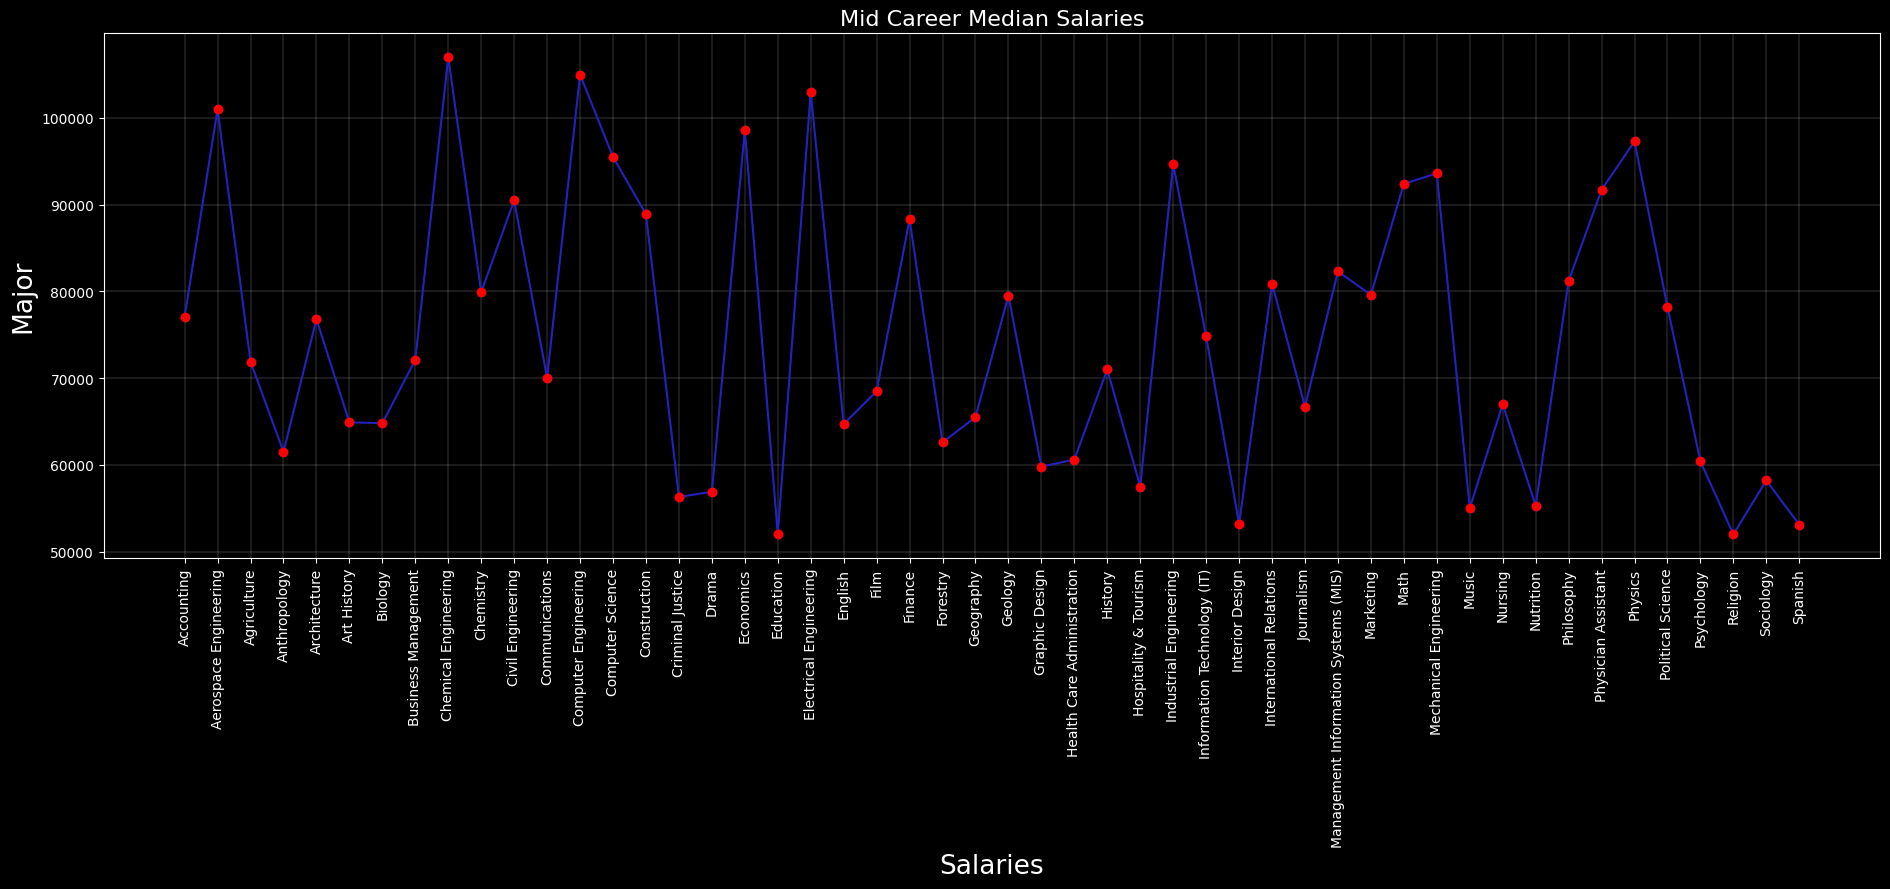

In [86]:
def mid_career_median_salary() -> plt:

    grouped_data: pd.DataFrame = (
        clean_df.groupby(["Undergraduate Major", "Mid-Career Median Salary"])
        .sum()
        .reset_index()
    )

    x_cor: pd.Series = grouped_data["Undergraduate Major"]
    y_cor: pd.Series = grouped_data["Mid-Career Median Salary"]

    x_cor_label: str = "Salaries"
    y_cor_label: str = "Major"
    plot_title: str = "Mid Career Median Salaries"

    plt.figure(figsize=(19, 9))
    plt.plot(x_cor, y_cor, marker="o", linestyle="-", color="#2422bf")

    # Add titles and labels
    plt.title(plot_title, fontsize=16)
    plt.xlabel(x_cor_label, fontsize=19)
    plt.ylabel(y_cor_label, fontsize=19)
    plt.xticks(rotation=90)

    # Add grid lines
    plt.grid(visible=True, which="both", linestyle="-", linewidth=0.1577)

    # Adding dots
    plt.scatter(x_cor, y_cor, color="r", zorder=5)

    # Display the plot
    plt.tight_layout()
    plt.show()


mid_career_median_salary()

### Highest Potential Careers Visualizations:-


Column Spread Already Exist


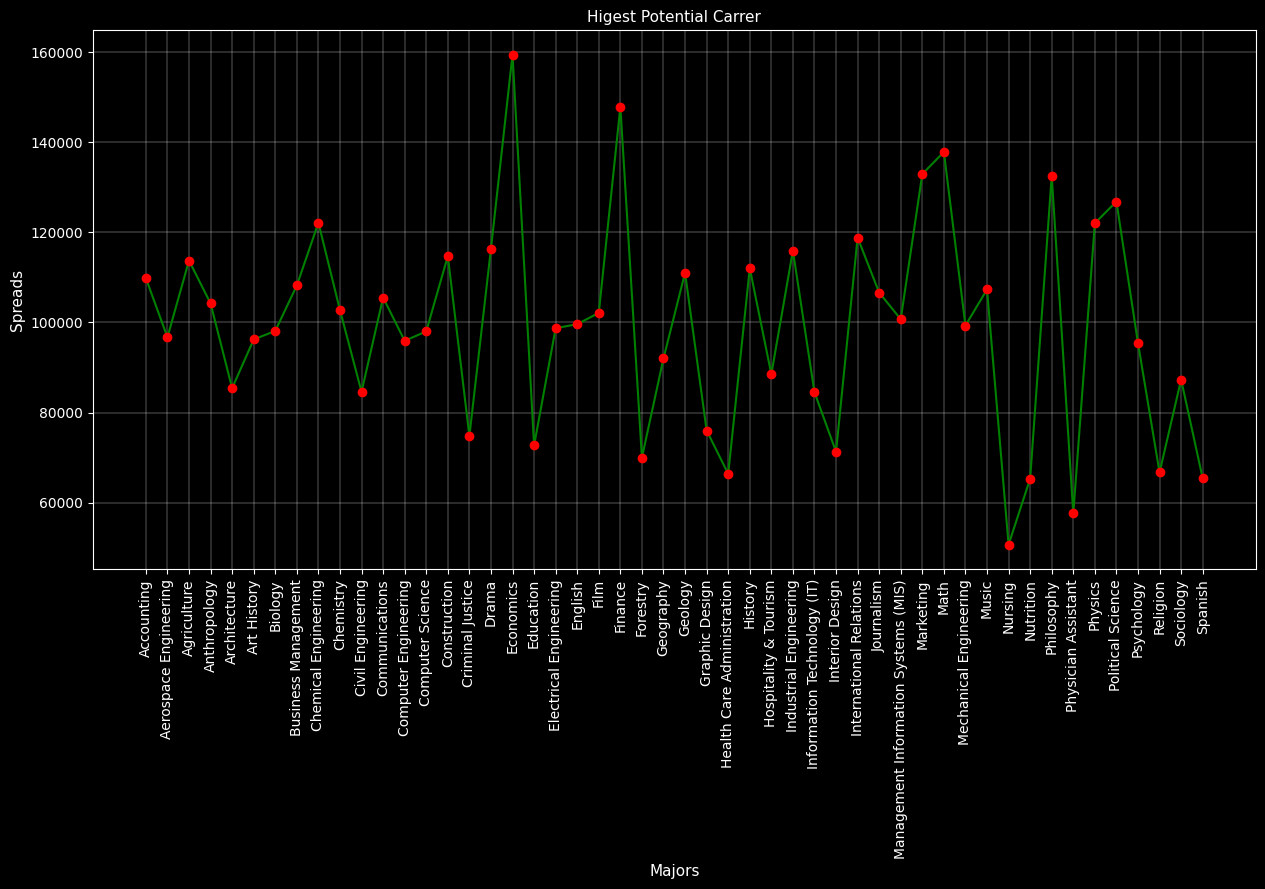

In [101]:
def highest_potential_career() -> plt:

    # Calculate the spread between 90th and 10th percentile salaries
    ninth_percentile = clean_df["Mid-Career 90th Percentile Salary"]
    tenth_percentile = clean_df["Mid-Career 10th Percentile Salary"]
    low_risk_major = ninth_percentile - tenth_percentile

    try:
        # Insert the calculated column into clean_df
        clean_df.insert(loc=2, column="Spread", value=low_risk_major)
    except:
        print("Column Spread Already Exist")

    # -> Graph Plotting Mechanism: <- #

    y_coords = clean_df["Spread"]
    x_coords = clean_df["Undergraduate Major"]
    plot_title = "Higest Potential Carrer"
    x_coords_label = "Majors"
    y_coords_label = "Spreads"

    plt.figure(figsize=(15, 7))
    plt.xticks(rotation=90)

    plt.title(plot_title, fontsize=11)
    plt.xlabel(x_coords_label, fontsize=11)
    plt.ylabel(y_coords_label, fontsize=11)

    plt.grid(visible=True, which="both", linewidth=0.25)
    plt.scatter(x_coords, y_coords, color="r", zorder=5)

    plt.plot(x_coords, y_coords, color="g")

    plt.show()


highest_potential_career()